Amplitude (A): 0.035844017714612736 ± 0.10215976129566066
Larmor precession frequency (omega): 2.1786124138377994 ± 0.9851754640553166
Phase (phi): 3.33503334827273 ± 5.652146587095359


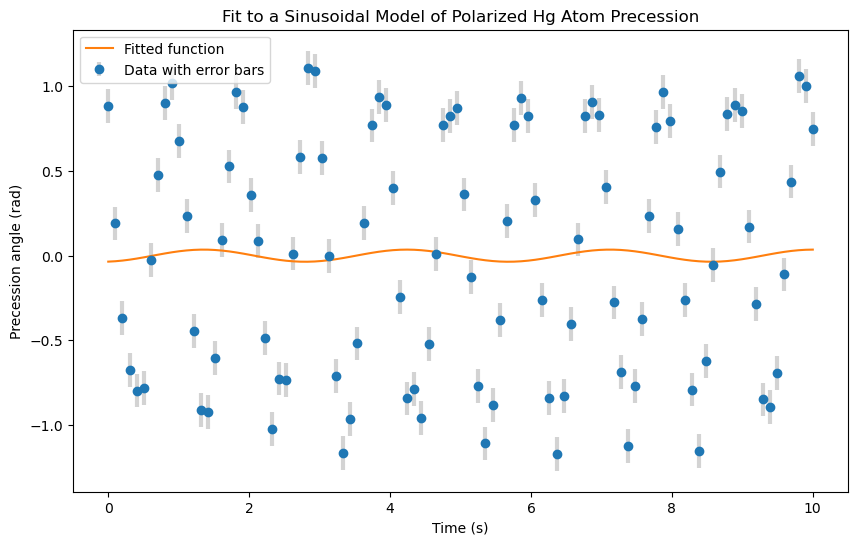

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function (sinusoidal)
def sinusoidal_model(t, A, omega, phi):
    return A * np.cos(omega * t + phi)

# Generate synthetic data
np.random.seed(0)  # For reproducible results
time = np.linspace(0, 10, 100)  # Time in seconds
true_amplitude = 1.0
true_frequency = 2.0 * np.pi  # Frequency in rad/s
true_phase = np.pi / 4  # Phase in radians

# True signal (without noise)
true_signal = true_amplitude * np.cos(true_frequency * time 
                                      + true_phase)

# Simulate measurements with Gaussian noise
measurement_sigma = 0.1  # Standard deviation of the noise
measurements = true_signal + np.random.normal(0, measurement_sigma, 
                                              size=time.size)

# Perform curve fitting
initial_guess = [1.0, 2.0, 0.5]  # Initial guess for the parameters
popt, pcov = curve_fit(sinusoidal_model, time, measurements, 
                       sigma=np.full(time.size, measurement_sigma),
                       p0=initial_guess)
A_fit, omega_fit, phi_fit = popt
sigma_A, sigma_omega, sigma_phi = np.sqrt(np.diag(pcov))

# Print the fitted parameters and their uncertainties
print(f"Amplitude (A): {A_fit} ± {sigma_A}")
print(f"Larmor precession frequency (omega): {omega_fit} ± {sigma_omega}")
print(f"Phase (phi): {phi_fit} ± {sigma_phi}")

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.errorbar(time, measurements, yerr=measurement_sigma, fmt='o', 
 label='Data with error bars',ecolor='lightgray', elinewidth=3, capsize=0)
plt.plot(time, sinusoidal_model(time, *popt), label='Fitted function')
plt.xlabel('Time (s)')
plt.ylabel('Precession angle (rad)')
plt.title('Fit to a Sinusoidal Model of Polarized Hg Atom Precession')
plt.legend()
plt.show()


In [13]:
import numpy as np

# Generate a synthetic dataset
np.random.seed(0)  # Seed for reproducibility

# Let's assume x_i represents time in seconds from 0 to 10 with 100 measurements
x_i = np.linspace(0, 10, 100)

# Assume a true model for y_i, e.g., y = A * sin(omega * x + phi)
# For the true values, let's use A = 1, omega = 2 * pi (1 Hz frequency), phi = pi / 4
A_true = 1
omega_true = 2 * np.pi
phi_true = np.pi / 4

# Generate the 'true' y_i values based on the model
y_i_true = A_true * np.sin(omega_true * x_i + phi_true)

# Add some noise to simulate measurement errors, with a standard deviation of 0.1
sigma_i = np.full_like(x_i, 0.1)  # Constant error for all measurements
noise = np.random.normal(0, sigma_i)
y_i = y_i_true + noise

# Now let's calculate Theta using the equation
numerator = (np.sum(y_i * np.sin(x_i) / sigma_i**2) * np.sum(np.cos(x_i)**2 / sigma_i**2) -
             np.sum(y_i * np.cos(x_i) / sigma_i**2) * np.sum(np.sin(x_i) * np.cos(x_i) / sigma_i**2))
denominator = (np.sum(y_i * np.cos(x_i) / sigma_i**2) * np.sum(np.sin(x_i)**2 / sigma_i**2) -
               np.sum(y_i * np.sin(x_i) / sigma_i**2) * np.sum(np.sin(x_i) * np.cos(x_i) / sigma_i**2))

Theta = numerator / denominator

# Compute phase phi
phi = np.arctan(Theta)

# Numerical estimation of the derivative of Theta with respect to y_i
# We'll perturb each y_i slightly and see how Theta changes
epsilon = 1e-6  # A small number for perturbation
dTheta_dy_i = np.zeros_like(y_i)
for j in range(len(y_i)):
    y_i_perturbed = y_i.copy()
    y_i_perturbed[j] += epsilon  # Perturb only the j-th measurement
    # Recalculate Theta with the perturbed y_i
    numerator_perturbed = (np.sum(y_i_perturbed * np.sin(x_i) / sigma_i**2) * np.sum(np.cos(x_i)**2 / sigma_i**2) -
                           np.sum(y_i_perturbed * np.cos(x_i) / sigma_i**2) * np.sum(np.sin(x_i) * np.cos(x_i) / sigma_i**2))
    denominator_perturbed = (np.sum(y_i_perturbed * np.cos(x_i) / sigma_i**2) * np.sum(np.sin(x_i)**2 / sigma_i**2) -
                             np.sum(y_i_perturbed * np.sin(x_i) / sigma_i**2) * np.sum(np.sin(x_i) * np.cos(x_i) / sigma_i**2))
    Theta_perturbed = numerator_perturbed / denominator_perturbed
    # Approximate the partial derivative
    dTheta_dy_i[j] = (Theta_perturbed - Theta) / epsilon

# Now we use the numerical derivatives to estimate sigma_phi
sigma_phi_squared = (1 / (1 + Theta**2)**2) * np.sum((dTheta_dy_i**2) * sigma_i**2)
sigma_phi = np.sqrt(sigma_phi_squared)

print(f"Theta: {Theta}")
print(f"Phase (phi): {phi}")
print(f"Uncertainty in phase (sigma_phi): {sigma_phi}")

Theta: 0.767876124540944
Phase (phi): 0.6548440096238182
Uncertainty in phase (sigma_phi): 0.3871149314243771
